In [34]:
import pandas as pd

In [35]:
datos_consumo = pd.read_excel('datos1.xlsx')

In [36]:
datos_consumo.head()

,Fecha (dd/mm/aa),Momento,Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
0,2022-08-18,desayno,capuccino,74,5.81,3.98,5.08,50,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
1,2022-08-18,snack,fresas con chamoy,56,14.00,0.00,0.00,2,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
2,2022-08-18,comida,2 tacos de pollo y brocoli,400,16.60,0.00,0.96,98,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
3,2022-08-18,cena,quesadillas,225,22.35,0.00,10.00,409,https://www.fatsecret.com.mx/calor%C3%ADas-nut...
4,2022-08-19,desayuno,latte helado,99,17.00,0.00,1.00,30,https://www.fatsecret.com.mx/calor%C3%ADas-nut...


In [37]:
datos_consumo.groupby("Momento").count()

,Fecha (dd/mm/aa),Nombre alimento,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg),Fuente
Momento,,,,,,,,
cena,78,78,78,78,78,78,78,78
cena,3,3,3,3,3,3,3,3
comida,81,81,81,81,81,81,81,81
desayno,5,5,5,5,5,5,5,5
desayuno,77,77,77,77,77,77,77,77
snack,58,58,58,58,58,58,58,58


In [38]:
datos_consumo.describe()

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
count,302.000000,302.000000,302.000000,302.000000,302.000000
mean,241.201987,28.826126,8.691722,9.383742,445.486755
std,155.940600,19.784906,8.836804,10.516865,958.979270
min,16.000000,0.850000,0.000000,0.000000,0.000000
25%,120.000000,16.600000,2.130000,2.000000,58.000000
50%,194.000000,22.350000,5.400000,6.000000,194.000000
75%,354.750000,36.257500,14.500000,13.750000,608.750000
max,790.000000,88.000000,38.510000,45.000000,8116.000000


In [39]:
datos_seleccionados = datos_consumo.iloc[:,3:8]

In [40]:
datos_seleccionados

,Calorías (kcal),Carbohidratos (g),Lípidos/grasas (g),Proteína (g),Sodio (mg)
0,74,5.81,3.98,5.08,50
1,56,14.00,0.00,0.00,2
2,400,16.60,0.00,0.96,98
3,225,22.35,0.00,10.00,409
4,99,17.00,0.00,1.00,30
...,...,...,...,...,...
297,384,19.20,13.00,45.00,726
298,338,33.70,15.03,16.18,888
299,225,22.35,0.00,10.00,409
300,62,5.20,4.28,2.30,476


In [41]:
datos_seleccionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calorías (kcal)     302 non-null    int64  
 1   Carbohidratos (g)   302 non-null    float64
 2   Lípidos/grasas (g)  302 non-null    float64
 3   Proteína (g)        302 non-null    float64
 4   Sodio (mg)          302 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.9 KB


In [42]:
datos_seleccionados.isnull().values.any()
# buscamos valores nulos y obtenemos True o False dependiendo si hay o no
dataset = datos_seleccionados.dropna()
# creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados
dataset.isnull().sum()
# validamos que no tenemos valoresulos en ninguna columna, todos deben dar cero

Calorías (kcal)       0
Carbohidratos (g)     0
Lípidos/grasas (g)    0
Proteína (g)          0
Sodio (mg)            0
dtype: int64

In [43]:
dataset.columns
# vemos los nombres de nuestras columnaspara asignarlos a las variables
X = dataset[['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']].values
# variables independientes
y = dataset['Calorías (kcal)'].values

In [44]:
from sklearn.model_selection import train_test_split

# importamos la herramienta para dividir los datos de SciKit-Learn

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
# asignación de los datos 80% para entrenamiento y 20% paraprueba

In [45]:
from sklearn.linear_model import LinearRegression
# importamos la clase de regresión lineal
modelo_regresion = LinearRegression()
# modelo de regresión

In [46]:
modelo_regresion.fit(X_train, y_train)

LinearRegression()

In [47]:
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df

,Coeficientes
Carbohidratos (g),4.092808
Lípidos/grasas (g),7.517306
Proteína (g),4.454957
Sodio (mg),0.000468


In [48]:
y_pred = modelo_regresion.predict(X_test)

In [49]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción':
y_pred, 'Diferencia': y_test-y_pred})
# creamos un dataframe con los valores actuales y los depredicción
muestra_validacion = validacion.head(25)
# elegimos una muestra con 25 valores
muestra_validacion
# desplegamos esos 25 valores

,Actual,Predicción,Diferencia
0,196,202.164682,-6.164682
1,129,147.306111,-18.306111
2,351,353.585442,-2.585442
3,351,353.585442,-2.585442
4,145,155.703283,-10.703283
5,99,89.422501,9.577499
6,120,132.513396,-12.513396
7,333,347.816216,-14.816216
8,225,151.591141,73.408859
9,244,244.905564,-0.905564


In [50]:
validacion["Diferencia"].describe()

count     61.000000
mean       2.452100
std       48.025336
min      -80.032839
25%      -14.816216
50%       -7.493033
75%       -1.949294
max      312.360973
Name: Diferencia, dtype: float64

In [51]:
from sklearn.metrics import r2_score
# importamos la métrica R cuadrada (coeficiente de determinación)

r2_score(y_test, y_pred)

0.8695578543699648

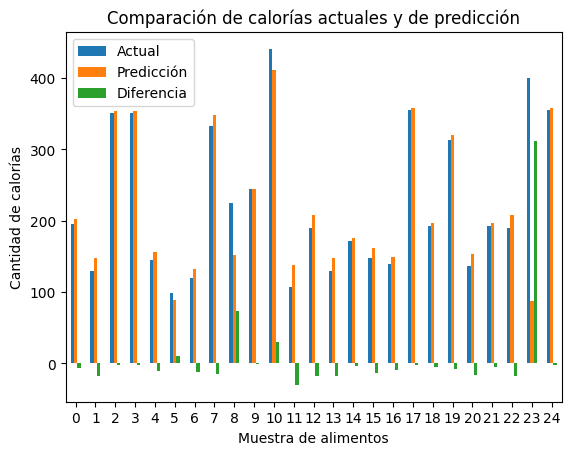

In [52]:
import matplotlib.pyplot as plt
# importamos la librería que nos permitirá graficar
muestra_validacion.plot.bar(rot=0)
# creamos un gráfico de barras con el dataframe que contiene nuestros datos actuales y de predicción
plt.title("Comparación de calorías actuales y de predicción")
# indicamos el título del gráfico
plt.xlabel("Muestra de alimentos")
# indicamos la etiqueta del eje de las x, los alimentos
plt.ylabel("Cantidad de calorías")
# indicamos la etiqueta del eje de las y, la cantidad de calorías
plt.show()
# desplegamos el gráfico

1. Curva de Aprendizaje

  Importemos la libreria matplotlibmyhplot como plt
  
  Creamos dos listas vacias train_scores y test_scores

  Recorremos un rango de tamaño de entrenamiento (por ejemplo,del 10% al 90% con un intervalo del 10%)

Para cada tamaño de entrenamiento
  Dividimos los datos en conjuntos de entrenamiento y
  prueba con el tamaño especificado
  
  Entrenamos un modelo de regresión lineal con el conjunto de entrenamiento.
  
  Calculamos y almacenamos el puntaje R^2 para el conjunto de entrenamiento y el conjunto de prueba en las listas train_scores y test_scores, respectivamente.

Finalmente, graficamos las curvas de aprendizaje para el puntaje R^2 con respecto al tamaño del conjunto de entrenamiento.

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [54]:
#Curva de aprendizaje R2
train_scores = []
test_scores= []
#Creamos dos listas vacias para almacenar los HSE
train_mse=[]
test_mse=[]

In [55]:
for train_size in range(10,100,10):
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=1-train_size/100, random_state=0)
  model = LinearRegression()
  model.fit(X_train,y_train)
  #Calculamos y almacenamos el HSE y R2 para el conjunto de entrenamiento y el conjunto de prueba
  train_mse.append(mean_squared_error(y_train,model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test,model.predict(X_test)))
  train_scores.append(r2_score(y_train, model.predict(X_train)))
  test_scores.append(r2_score(y_test, model.predict(X_test)))

In [56]:
train_scores

[0.9145288770562504,
 0.9392417226300749,
 0.8891374224243614,
 0.8969311644327507,
 0.8867564401212245,
 0.9008925143087502,
 0.9062536542712379,
 0.9129392474380599,
 0.919426502656389]

In [57]:
test_scores

[0.8920348816078946,
 0.8874147877600674,
 0.9114614787099966,
 0.9117637318980333,
 0.9314943957721835,
 0.9199923383729514,
 0.9081438376587583,
 0.8695578543699648,
 0.626706830401805]

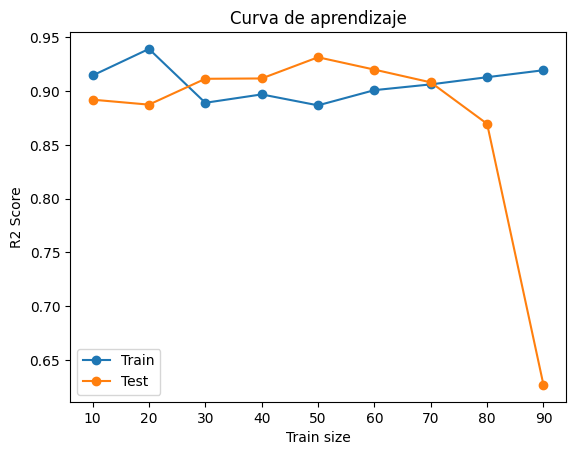

In [58]:
plt.plot(range(10,100,10),train_scores,'o-',label='Train')
plt.plot(range(10,100,10),test_scores,'o-',label='Test')
plt.xlabel('Train size')
plt.ylabel('R2 Score')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()

###Interpretación de la curva de aprendizaje:

* **Curva de entrenamiento por encima de la curva de prueba**: Indica que el modelo está empezando a sobreajustarse a los datos de entrenamiento.

* **Curva de prueba con una pendiente descendente**: Indica que el modelo no tiene suficientes datos para aprender la relación entre las variables.

* **Curva de prueba con una pendiente estable**: Indica que el modelo está aprendiendo correctamente la relación entre las variables y que el tamaño del conjunto de entrenamiento no tiene un gran impacto en el rendimiento del modelo.

### en resumen
* Curva de entrenamiento por encima de la curva de prueba: Sobreajuste.
* Curva de prueba con pendiente descendente: Pocos datos.
* Curva de prueba con pendiente estable: Aprendizaje correcto.

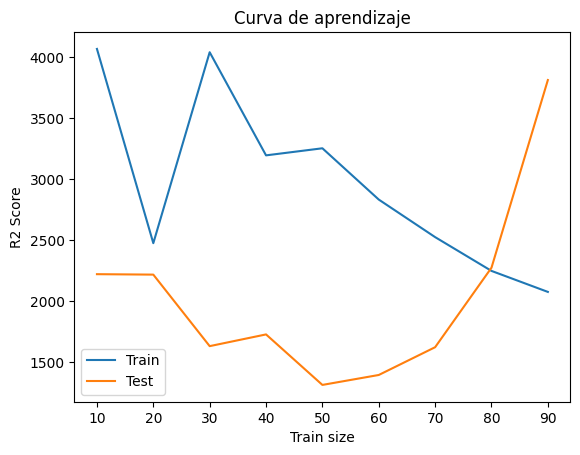

In [59]:
plt.plot(range(10,100,10),train_mse,label='Train')
plt.plot(range(10,100,10),test_mse,label='Test')
plt.xlabel('Train size')
plt.ylabel('R2 Score')
plt.title('Curva de aprendizaje')
plt.legend()
plt.show()